# Guided Project:
# Predicting House Sale Prices

## Introduction

In this course, we started by building intuition for model based learning, explored how the linear regression model worked, understood how the two different approaches to model fitting worked, and some techniques for cleaning, transforming, and selecting features. In this guided project, you can practice what you learned in this course by exploring ways to improve the models we built.<br>

You'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. You can read more about why the data was collected [here](http://ww2.amstat.org/publications/jse/v19n3/decock.pdf). You can also read about the different columns in the data [here](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt).<br>

Let's start by setting up a pipeline of functions that will let us quickly iterate on different models.

![](https://s3.amazonaws.com/dq-content/240/pipeline.svg)



### instructions
* Import pandas, matplotlib, and numpy into the environment. Import the classes you need from scikit-learn as well.
* Read `AmesHousing.tsv` into a pandas data frame.
* For the following functions, we recommend creating them in the first few cells in the notebook. This way, you can add cells to the end of the notebook to do experiments and update the functions in these cells.
  * Create a function named `transform_features()` that, for now, just returns the `train` data frame.
  * Create a function named `select_features()` that, for now, just returns the `Gr Liv Area` and `SalePrice` columns from the train data frame.
  * Create a function named `train_and_test()` that, for now:
    * Selects the first `1460` rows from from data and assign to `train`.
    * Selects the remaining rows from data and assign to `test`.
    * Trains a model using all numerical columns except the `SalePrice` column (the target column) from the data frame returned from select_features()
    * Tests the model on the test set using and returns the RMSE value.

In [408]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import datetime

In [409]:
data = pd.read_csv('AmesHousing.tsv', delimiter='\t')
train = data[:1460]
test = data[1460:]

In [410]:
def get_numeric_features(df):
    return df.select_dtypes(include=['int', 'float']).drop(['SalePrice'],axis=1)

In [411]:
def transform_features():
    return train

def select_features():
     return train[['Gr Liv Area', 'SalePrice']]
    
def train_and_test():
    
    X = get_numeric_features(select_features)
    y = select_features()['SalePrice']
    lr = LinearRegression
    lr.fit(X, y)

    return np.sqrt(mean_squared_error(lr.predict(test[X.columns]), test['SalePrice']))

## Feature Engineering

Let's now start to removing features with many missing values, diving deeper into potential categorical features, and transforming text and numerical columns. Update `transform_features()` so that any column from the data frame with more than 25% (or another cutoff value) missing values is dropped. You also need to remove any columns that leak information about the sale (e.g. like the year the sale happened). In general, the goal of this function is to:

* remove features that we don't want to use in the model, just based on the number of missing values or data leakage
* transform features into the proper format (numerical to categorical, scaling numerical, filling in missing values, etc)
* create new features by combining other features

Next, you need to get more familiar with the remaining columns by reading the [data documentation](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt) for each column, determining what transformations are necessary (if any), and more. As we mentioned earlier, **succeeding in predictive modeling (and competitions like Kaggle) is highly dependent on the quality of features the model has**. 
* Libraries like scikit-learn has made it quick and easy to simply try and tweak many different models, 

### but cleaning, selecting, and transforming features is still more of an art that requires a bit of human ingenuity.

### Data Overview
full document  : https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt

* NAME: AmesHousing.txt
* TYPE: Population
* SIZE: `2930` observations, `82` variables
* ARTICLE TITLE: Ames Iowa|Alternative to the Boston Housing Data Set

### Variable Description
Tab characters are used to separate variables in the data file. The data has 82 columns which include 
* 23 nominal, 
* 23 ordinal, 
* 14 discrete, and 
* 20 continuous variables 
* (and 2 additional observation identifiers).

#### Numerical variables
#|feature|description
---|---|---
1|Lot Frontage (Continuous)|Linear feet of street connected to property
2|Lot Area (Continuous)|Lot size in square feet
3|Year Built (Discrete)|Original construction date
4|Year Remod/Add (Discrete)|Remodel date (same as construction date if no remodeling or additions)
5|Mas Vnr Area (Continuous)|Masonry veneer area in square feet
6|BsmtFin SF 1 (Continuous)|Type 1 finished square feet
7|BsmtFin SF 2 (Continuous)|Type 2 finished square feet
8|Bsmt Unf SF (Continuous)|Unfinished square feet of basement area
9|Total Bsmt SF (Continuous)|Total square feet of basement area
10|1st Flr SF (Continuous)|First Floor square feet
11|2nd Flr SF (Continuous)	|Second floor square feet
12|Low Qual Fin SF (Continuous)|Low quality finished square feet (all floors)
13|Gr Liv Area (Continuous)|Above grade (ground) living area square feet
14|Bsmt Full Bath (Discrete)|Basement full bathrooms
15|Bsmt Half Bath (Discrete)|Basement half bathrooms
16|Full Bath (Discrete)|Full bathrooms above grade
17|Half Bath (Discrete)|Half baths above grade
18|Bedroom (Discrete)|Bedrooms above grade (does NOT include basement bedrooms)
19|Kitchen (Discrete)|Kitchens above grade
20|TotRmsAbvGrd	(Discrete)|Total rooms above grade (does not include bathrooms)
21|Fireplaces (Discrete)|Number of fireplaces
22|Garage Yr Blt (Discrete)|Year garage was built
23|Garage Cars (Discrete)|Size of garage in car capacity
24|Garage Area (Continuous)|Size of garage in square feet
25|Wood Deck SF (Continuous)|Wood deck area in square feet
26|Open Porch SF (Continuous)|Open porch area in square feet
27|Enclosed Porch (Continuous)|Enclosed porch area in square feet
28|3-Ssn Porch (Continuous)|Three season porch area in square feet
29|Screen Porch (Continuous)|Screen porch area in square feet
30|Pool Area (Continuous)|Pool area in square feet
31|Misc Val (Continuous)|$Value of miscellaneous feature
32|Mo Sold (Discrete)|Month Sold (MM)
33|Yr Sold (Discrete)|Year Sold (YYYY)


### instructions
- As we mentioned earlier, we recommend adding some cells to explore and experiment with different features (before rewriting these functions).
- The `transform_features()` function shouldn't modify the `train` data frame and instead return a new one entirely. This way, we can keep using `train` in the experimentation cells.
- Which columns contain less than 5% missing values?
  * For numerical columns that meet this criteria, let's fill in the missing values using the most popular value for that column.
- What new features can we create, that better capture the information in some of the features?
  * An example of this would be the `years_until_remod` feature we created in the last mission.
- Which columns need to be dropped for other reasons?
  * Which columns aren't useful for machine learning?
  * Which columns leak data about the final sale?

In [412]:
train_ = train.copy()

null_count_ratio = train_.isnull().sum()/train_.shape[0]
lt_5per_nulls = null_count_ratio[null_count_ratio < .05].index
gte_5per_nulls = null_count_ratio[null_count_ratio >= .05].index

train_ = train_.drop(gte_5per_nulls, axis=1)

for lt5 in lt_5per_nulls:
    train_[lt5].fillna(train_[lt5].value_counts().index[0],
                       inplace=True)

In [413]:
for col in train_.columns:
    if (train_[col].isnull().sum()):
        print(col)
else:
    print('there exists no null in any column')

there exists no null in any column


In [414]:
lt_5per_nulls

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
 

In [415]:
gte_5per_nulls

Index(['Lot Frontage', 'Alley', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

In [418]:
train_numeric = train_.select_dtypes(include=['int', 'float']).drop(['SalePrice'], axis=1)
train_numeric.head()

,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,1,526301100,20,31770,6,5,1960,1960,112.0,639.0,...,528.0,210,62,0,0,0,0,0,5,2010
1,2,526350040,20,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
2,3,526351010,20,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
3,4,526353030,20,11160,7,5,1968,1968,0.0,1065.0,...,522.0,0,0,0,0,0,0,0,4,2010
4,5,527105010,60,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010


In [419]:
# first 12 features
train_numeric.iloc[:, :12].head()

,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF
0,1,526301100,20,31770,6,5,1960,1960,112.0,639.0,0.0,441.0
1,2,526350040,20,11622,5,6,1961,1961,0.0,468.0,144.0,270.0
2,3,526351010,20,14267,6,6,1958,1958,108.0,923.0,0.0,406.0
3,4,526353030,20,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0
4,5,527105010,60,13830,5,5,1997,1998,0.0,791.0,0.0,137.0


In [420]:
# second 12 features
train_numeric.iloc[:, 12:24].head()

,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd
0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7
1,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5
2,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6
3,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8
4,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6


In [421]:
# third 12 features
train_numeric.iloc[24:, :36].head()

,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
24,25,527402250,20,12537,5,6,1971,2008,0.0,734.0,...,500.0,0,0,0,0,0,0,0,4,2010
25,26,527403020,20,8450,5,6,1968,1968,0.0,775.0,...,304.0,0,85,184,0,0,0,0,7,2010
26,27,527404120,20,8400,4,5,1970,1970,0.0,804.0,...,525.0,240,0,0,0,0,0,0,4,2010
27,28,527425090,20,10500,4,5,1971,1971,0.0,432.0,...,0.0,0,0,0,0,0,0,0,4,2010
28,29,527427230,120,5858,7,5,1999,1999,0.0,1051.0,...,511.0,203,68,0,0,0,0,0,6,2010


In [422]:
# categorical features to drop
features_to_drop = ['Order', 'PID', 'MS SubClass']
train_numeric.drop(features_to_drop, axis=1).head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,...,528.0,210,62,0,0,0,0,0,5,2010
1,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,...,730.0,140,0,0,0,120,0,0,6,2010
2,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,...,312.0,393,36,0,0,0,0,12500,6,2010
3,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,...,522.0,0,0,0,0,0,0,0,4,2010
4,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,...,482.0,212,34,0,0,0,0,0,3,2010


In [423]:
train_numeric = train_numeric.drop(features_to_drop, axis=1)

In [424]:
train_numeric['years_until_remod'] = train_['Year Built'] - train_['Year Remod/Add']
train_numeric['YrMo Sold'] = (train_['Yr Sold'].apply(lambda x: str(x)) +\
                       train_['Mo Sold'].apply(lambda x: '0'+str(x) if len(str(x)) == 1
                                              else str(x))).apply(int)

train_numeric['house_age1'] = train_['Yr Sold'] - train_['Year Built']
train_numeric['house_age2'] = train_['Yr Sold'] - train_['Year Remod/Add']

* Transform **`ordinal features`** into **`discrete numerical features`**

In [430]:
ordinal_index_map = {
    'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1
}

train_numeric['Exter Cond Mapped'] = train_['Exter Cond'].map(ordinal_index_map)
train_numeric['Exter Qual Mapped'] = train_['Exter Qual'].map(ordinal_index_map)
train_numeric['Bsmt Qual Mapped'] = train_['Bsmt Qual'].map(ordinal_index_map)
train_numeric['Bsmt Cond Mapped'] = train_['Bsmt Cond'].map(ordinal_index_map)
train_numeric['Heating QC Mapped'] = train_['Heating QC'].map(ordinal_index_map)
train_numeric['Kitchen Qual Mapped'] = train_['Kitchen Qual'].map(ordinal_index_map)

########

ordinal_index_map2 = {
    'Gd':5, 'Av':4, 'Mn':3, 'No':2, 'NA':1
}
train_numeric['Bsmt Exposure Mapped'] = train_['Bsmt Exposure'].map(ordinal_index_map2)

########

ordinal_index_map3 = {
    'GLQ':7, 'ALQ':6, 'BLQ':5, 'Rec':4, 'LwQ':3, 'Unf':2, 'NA':1
}
train_numeric['BsmtFin Type 1 Mapped'] = train_['BsmtFin Type 1'].map(ordinal_index_map3)
train_numeric['BsmtFin Type 2 Mapped'] = train_['BsmtFin Type 2'].map(ordinal_index_map3)

########

ordinal_index_map4 = {
    'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5,
    'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1
}
train_numeric['Functional Mapped'] = train_['Functional'].map(ordinal_index_map4)

########

ordinal_index_map5 = {
    'Y':3, 'P':2, 'N':1
}
train_numeric['Paved Drive Mapped'] = train_['Paved Drive'].map(ordinal_index_map5)

########
ordinal_index_map6 = {
    'Grvl':3, 'Pave':2, 'NA':1
}

train_numeric['Street Mapped'] = train_['Street'].map(ordinal_index_map6)

########
ordinal_index_map7 = {
    'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1
}
train_numeric['Lot Shape Mapped'] = train_['Lot Shape'].map(ordinal_index_map7)

########
ordinal_index_map8 = {
    'Lvl':4, 'Bnk':3, 'HLS':2, 'Low':1
}

train_numeric['Land Contour Mapped'] = train_['Land Contour'].map(ordinal_index_map8)

########
ordinal_index_map9 = {
    'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1
}

train_numeric['Utilities Mapped'] = train_['Utilities'].map(ordinal_index_map9)

########
ordinal_index_map10 = {
    'Gtl':3, 'Mod':2, 'Sev':1
}

train_numeric['Land Slope Mapped'] = train_['Land Slope'].map(ordinal_index_map10)

########

In [431]:
train_numeric.columns

Index(['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'years_until_remod', 'YrMo Sold', 'house_age1', 'house_age2',
       'Exter Cond Mapped', 'Exter Qual Mapped', 'Bsmt Qual Mapped',
       'Bsmt Cond Mapped', 'Heating QC Mapped', 'Kitchen Qual Mapped',
       'Bsmt Exposure Mapped', 'BsmtFin Type 1 Mapped',
       'BsmtFin Type 2 Mapped', 'Functional Mapped', 'Paved Drive Mapped',
       'Street Mapped', 'Lot Shape Mapped', 'Land Contour Mapped',
       'Utilities Mapped', 'Land S

In [432]:
train_numeric['compound_overall_score_add'] = train_['Overall Qual'] + train_['Overall Cond']
train_numeric['compound_overall_score_mult'] = train_['Overall Qual'] * train_['Overall Cond']

train_numeric['compound_exter_score_add'] = train_numeric['Exter Cond Mapped'] + train_numeric['Exter Qual Mapped']
train_numeric['compound_exter_score_mult'] = train_numeric['Exter Cond Mapped'] * train_numeric['Exter Qual Mapped']

train_numeric['compound_bsmt_score_add'] = train_numeric['Bsmt Cond Mapped'] + train_numeric['Bsmt Qual Mapped']
train_numeric['compound_bsmt_score_mult'] = train_numeric['Bsmt Cond Mapped'] * train_numeric['Bsmt Qual Mapped']
train_numeric['compound_bsmt_score2_add'] = train_numeric['compound_bsmt_score_add'] +\
                                    train_numeric['Bsmt Exposure Mapped'] +\
                                    train_numeric['BsmtFin Type 1 Mapped'] +\
                                    train_numeric['BsmtFin Type 2 Mapped']
train_numeric['compound_bsmt_score2_mult'] = train_numeric['compound_bsmt_score_mult'] +\
                                    train_numeric['Bsmt Exposure Mapped'] *\
                                    train_numeric['BsmtFin Type 1 Mapped'] *\
                                    train_numeric['BsmtFin Type 2 Mapped']

In [433]:
train_numeric['Central Air Mapped'] = train_['Central Air'].map({'Y':1, 'N':0})

In [434]:
# Area related variables

train_numeric['liv_area_quality_overall_add'] = train_['Gr Liv Area'] + train_numeric['compound_overall_score_add']
train_numeric['liv_area_quality_overall_add2'] = train_['Gr Liv Area'] + train_numeric['compound_overall_score_mult']

train_numeric['liv_area_quality_overall_mult'] = train_['Gr Liv Area'] * train_numeric['compound_overall_score_add']
train_numeric['liv_area_quality_overall_mult2'] = train_['Gr Liv Area'] * train_numeric['compound_overall_score_mult']

train_numeric['bsmt_quality_area1_add'] = train_numeric['compound_bsmt_score_add'] + train_['Total Bsmt SF']
train_numeric['bsmt_quality_area1_add2'] = train_numeric['compound_bsmt_score_mult'] + train_['Total Bsmt SF']
train_numeric['bsmt_quality_area1_add3'] = train_numeric['compound_bsmt_score2_add'] + train_['Total Bsmt SF']
train_numeric['bsmt_quality_area1_add4'] = train_numeric['compound_bsmt_score2_mult'] + train_['Total Bsmt SF']

train_numeric['bsmt_quality_area1_mult'] = train_numeric['compound_bsmt_score_add'] * train_['Total Bsmt SF']
train_numeric['bsmt_quality_area1_mult2'] = train_numeric['compound_bsmt_score_mult'] * train_['Total Bsmt SF']
train_numeric['bsmt_quality_area1_mult3'] = train_numeric['compound_bsmt_score2_add'] * train_['Total Bsmt SF']
train_numeric['bsmt_quality_area1_mult4'] = train_numeric['compound_bsmt_score2_mult'] * train_['Total Bsmt SF']

In [435]:
train_numeric.shape

(1460, 74)

In [436]:
for col in train_numeric.columns:
    if train_numeric[col].isnull().sum():
        print(col, train_numeric[col].isnull().sum())

In [437]:
# After finishing feature creation, drop columns with any NaN.
train_numeric = train_numeric.dropna(how='any', axis=1)

In [438]:
train_numeric.shape

(1460, 74)

### Update `transform_features()` to transform test set later

In [443]:
def transform_features(df):
    
    df_ = df.copy()

    #null_count_ratio = train_.isnull().sum()/train_.shape[0]
    #lt_5per_nulls = null_count_ratio[null_count_ratio < .05].index
    #gte_5per_nulls = null_count_ratio[null_count_ratio >= .05].index

    df_ = df_.drop(gte_5per_nulls, axis=1)

    for lt5 in lt_5per_nulls:
        df_[lt5].fillna(train_[lt5].value_counts().index[0],
                           inplace=True)
    
    df_numeric = df_.select_dtypes(include=['int', 'float']).drop(['SalePrice'], axis=1)
    
    features_to_drop = ['Order', 'PID', 'MS SubClass']
    df_numeric = df_numeric.drop(features_to_drop, axis=1)
    
    
    # feature creation
    df_numeric['years_until_remod'] = df_['Year Built'] - df_['Year Remod/Add']
    df_numeric['YrMo Sold'] = (df_['Yr Sold'].apply(lambda x: str(x)) +\
                           df_['Mo Sold'].apply(lambda x: '0'+str(x) if len(str(x)) == 1
                                                  else str(x))).apply(int)

    df_numeric['house_age1'] = df_['Yr Sold'] - df_['Year Built']
    df_numeric['house_age2'] = df_['Yr Sold'] - df_['Year Remod/Add']

    ordinal_index_map = {
        'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1
    }

    df_numeric['Exter Cond Mapped'] = df_['Exter Cond'].map(ordinal_index_map)
    df_numeric['Exter Qual Mapped'] = df_['Exter Qual'].map(ordinal_index_map)
    df_numeric['Bsmt Qual Mapped'] = df_['Bsmt Qual'].map(ordinal_index_map)
    df_numeric['Bsmt Cond Mapped'] = df_['Bsmt Cond'].map(ordinal_index_map)
    df_numeric['Heating QC Mapped'] = df_['Heating QC'].map(ordinal_index_map)
    df_numeric['Kitchen Qual Mapped'] = df_['Kitchen Qual'].map(ordinal_index_map)

    ########

    ordinal_index_map2 = {
        'Gd':5, 'Av':4, 'Mn':3, 'No':2, 'NA':1
    }
    df_numeric['Bsmt Exposure Mapped'] = df_['Bsmt Exposure'].map(ordinal_index_map2)

    ########

    ordinal_index_map3 = {
        'GLQ':7, 'ALQ':6, 'BLQ':5, 'Rec':4, 'LwQ':3, 'Unf':2, 'NA':1
    }
    df_numeric['BsmtFin Type 1 Mapped'] = df_['BsmtFin Type 1'].map(ordinal_index_map3)
    df_numeric['BsmtFin Type 2 Mapped'] = df_['BsmtFin Type 2'].map(ordinal_index_map3)

    ########

    ordinal_index_map4 = {
        'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5,
        'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1
    }
    df_numeric['Functional Mapped'] = df_['Functional'].map(ordinal_index_map4)

    ########

    ordinal_index_map5 = {
        'Y':3, 'P':2, 'N':1
    }
    df_numeric['Paved Drive Mapped'] = df_['Paved Drive'].map(ordinal_index_map5)
    
    ordinal_index_map6 = {
    'Grvl':3, 'Pave':2, 'NA':1
    }

    df_numeric['Street Mapped'] = df_['Street'].map(ordinal_index_map6)

    ########
    ordinal_index_map7 = {
        'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1
    }
    df_numeric['Lot Shape Mapped'] = df_['Lot Shape'].map(ordinal_index_map7)

    ########
    ordinal_index_map8 = {
        'Lvl':4, 'Bnk':3, 'HLS':2, 'Low':1
    }

    df_numeric['Land Contour Mapped'] = df_['Land Contour'].map(ordinal_index_map8)

    ########
    ordinal_index_map9 = {
        'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1
    }

    df_numeric['Utilities Mapped'] = df_['Utilities'].map(ordinal_index_map9)

    ########
    ordinal_index_map10 = {
        'Gtl':3, 'Mod':2, 'Sev':1
    }

    df_numeric['Land Slope Mapped'] = df_['Land Slope'].map(ordinal_index_map10)

    
    df_numeric['compound_overall_score_add'] = df_['Overall Qual'] + df_['Overall Cond']
    df_numeric['compound_overall_score_mult'] = df_['Overall Qual'] * df_['Overall Cond']

    df_numeric['compound_exter_score_add'] = df_numeric['Exter Cond Mapped'] + df_numeric['Exter Qual Mapped']
    df_numeric['compound_exter_score_mult'] = df_numeric['Exter Cond Mapped'] * df_numeric['Exter Qual Mapped']

    df_numeric['compound_bsmt_score_add'] = df_numeric['Bsmt Cond Mapped'] + df_numeric['Bsmt Qual Mapped']
    df_numeric['compound_bsmt_score_mult'] = df_numeric['Bsmt Cond Mapped'] * df_numeric['Bsmt Qual Mapped']
    df_numeric['compound_bsmt_score2_add'] = df_numeric['compound_bsmt_score_add'] +\
                                        df_numeric['Bsmt Exposure Mapped'] +\
                                        df_numeric['BsmtFin Type 1 Mapped'] +\
                                        df_numeric['BsmtFin Type 2 Mapped']
    df_numeric['compound_bsmt_score2_mult'] = df_numeric['compound_bsmt_score_mult'] +\
                                        df_numeric['Bsmt Exposure Mapped'] *\
                                        df_numeric['BsmtFin Type 1 Mapped'] *\
                                        df_numeric['BsmtFin Type 2 Mapped']

    df_numeric['Central Air Mapped'] = df_['Central Air'].map({'Y':1, 'N':0})

    # Area related variables

    df_numeric['liv_area_quality_overall_add'] = df_['Gr Liv Area'] + df_numeric['compound_overall_score_add']
    df_numeric['liv_area_quality_overall_add2'] = df_['Gr Liv Area'] + df_numeric['compound_overall_score_mult']

    df_numeric['liv_area_quality_overall_mult'] = df_['Gr Liv Area'] * df_numeric['compound_overall_score_add']
    df_numeric['liv_area_quality_overall_mult2'] = df_['Gr Liv Area'] * df_numeric['compound_overall_score_mult']

    df_numeric['bsmt_quality_area1_add'] = df_numeric['compound_bsmt_score_add'] + df_['Total Bsmt SF']
    df_numeric['bsmt_quality_area1_add2'] = df_numeric['compound_bsmt_score_mult'] + df_['Total Bsmt SF']
    df_numeric['bsmt_quality_area1_add3'] = df_numeric['compound_bsmt_score2_add'] + df_['Total Bsmt SF']
    df_numeric['bsmt_quality_area1_add4'] = df_numeric['compound_bsmt_score2_mult'] + df_['Total Bsmt SF']

    df_numeric['bsmt_quality_area1_mult'] = df_numeric['compound_bsmt_score_add'] * df_['Total Bsmt SF']
    df_numeric['bsmt_quality_area1_mult2'] = df_numeric['compound_bsmt_score_mult'] * df_['Total Bsmt SF']
    df_numeric['bsmt_quality_area1_mult3'] = df_numeric['compound_bsmt_score2_add'] * df_['Total Bsmt SF']
    df_numeric['bsmt_quality_area1_mult4'] = df_numeric['compound_bsmt_score2_mult'] * df_['Total Bsmt SF']

    return df_numeric

In [444]:
test_numeric = transform_features(test)

In [445]:
test_numeric.shape

(1470, 74)

In [446]:
train_numeric.shape

(1460, 74)

### Nomarlize

In [447]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

scaled_train_numeric_arr = std_scaler.fit_transform(train_numeric.values)
scaled_train_numeric = pd.DataFrame(scaled_train_numeric_arr,
                                   columns = train_numeric.columns)

scaled_test_numeric_arr = std_scaler.transform(test_numeric.values)
scaled_test_numeric = pd.DataFrame(scaled_test_numeric_arr,
                                  columns = test_numeric.columns)

In [448]:
scaled_train_numeric.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,liv_area_quality_overall_mult,liv_area_quality_overall_mult2,bsmt_quality_area1_add,bsmt_quality_area1_add2,bsmt_quality_area1_add3,bsmt_quality_area1_add4,bsmt_quality_area1_mult,bsmt_quality_area1_mult2,bsmt_quality_area1_mult3,bsmt_quality_area1_mult4
0,3.063488,-0.076854,-0.512584,-0.362131,-1.183202,0.058288,0.431947,-0.304530,-0.249430,0.075153,...,0.066789,-0.100555,0.076143,0.078063,0.081379,0.120997,0.160508,0.201776,0.323471,0.431327
1,0.245250,-0.787019,0.352586,-0.329192,-1.135161,-0.582901,0.046401,0.547062,-0.646826,-0.387489,...,-1.116392,-0.969992,-0.388444,-0.390403,-0.389364,-0.398088,-0.508666,-0.566889,-0.457404,-0.383205
2,0.615224,-0.076854,0.352586,-0.428010,-1.279285,0.035389,1.072270,-0.304530,-0.330769,0.656960,...,-0.254198,-0.170568,0.655126,0.651410,0.654661,0.624075,0.282659,0.048869,0.403165,-0.065797
3,0.180627,0.633312,-0.512584,-0.098615,-0.798871,-0.582901,1.392431,-0.304530,1.154238,2.481826,...,1.072209,0.821125,2.478455,2.471667,2.474712,2.410001,1.665266,1.124724,1.741684,0.488779
4,0.554098,-0.787019,-0.512584,0.856629,0.642374,-0.582901,0.774655,-0.304530,-0.955912,-0.280007,...,-0.205796,-0.442038,-0.278717,-0.276199,-0.275174,-0.276892,-0.153425,-0.077405,-0.085283,-0.210762


In [449]:
scaled_test_numeric.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,liv_area_quality_overall_mult,liv_area_quality_overall_mult2,bsmt_quality_area1_add,bsmt_quality_area1_add2,bsmt_quality_area1_add3,bsmt_quality_area1_add4,bsmt_quality_area1_mult,bsmt_quality_area1_mult2,bsmt_quality_area1_mult3,bsmt_quality_area1_mult4
0,-0.020796,2.053643,-0.512584,0.988387,0.834540,0.184236,1.683281,-0.30453,-0.895489,0.722384,...,1.346492,1.346028,0.722830,0.723660,0.726903,0.736124,0.732611,0.710545,0.887221,0.567276
1,0.698171,1.343477,-0.512584,1.021327,0.882581,0.791075,2.458883,-0.30453,-0.716545,1.706083,...,0.774716,0.729224,1.708035,1.711867,1.714998,1.769721,2.126725,2.300220,2.315397,2.242474
2,0.193215,1.343477,-0.512584,1.021327,0.834540,-0.582901,-1.008778,-0.30453,1.347126,0.187309,...,1.702012,1.497989,0.188205,0.189936,0.181587,0.143864,0.259645,0.289938,-0.182973,-0.426972
3,-0.239284,0.633312,-0.512584,1.054266,0.882581,0.859774,0.231283,-0.30453,-0.498093,-0.382816,...,0.491375,0.364670,-0.381440,-0.378749,-0.377712,-0.377507,-0.244301,-0.158220,-0.170119,-0.248634
4,0.144958,0.633312,-0.512584,1.054266,0.882581,-0.582901,-1.008778,-0.30453,1.349450,0.189645,...,1.440750,1.110747,0.190539,0.192266,0.181587,0.137004,0.261711,0.291775,-0.302407,-0.523630


## Feature Selection

Now that we have cleaned and transformed a lot of the features in the data set, it's time to move on to feature selection for numerical features.

In [450]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

* Correlation matrix heatmap for all chosen features from above (68)

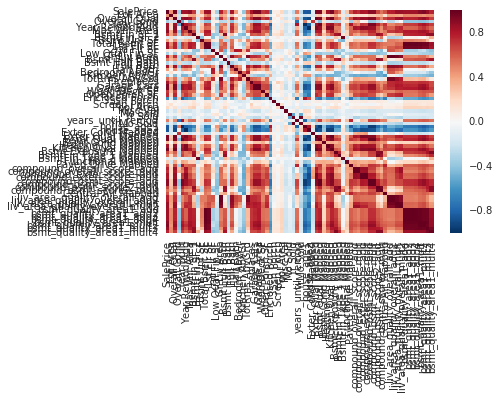

In [216]:
sns.heatmap(pd.concat([train['SalePrice'],train_numeric],axis=1).corr().corr())
plt.show()

In [451]:
abs_corr_vs_target = pd.concat([train['SalePrice'],train_numeric],axis=1).corr().iloc[1:,0].apply(abs).sort_values(ascending=False)
abs_corr_vs_target_over50 = abs_corr_vs_target[abs_corr_vs_target > 0.5]

In [452]:
abs_corr_vs_target_over30 = abs_corr_vs_target[abs_corr_vs_target > 0.3]

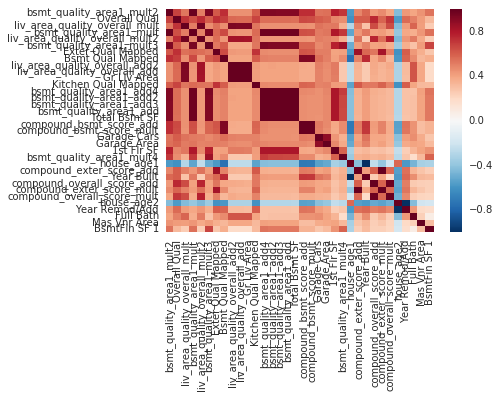

In [453]:
sns.heatmap(train_numeric[abs_corr_vs_target_over50.index].corr())
plt.show()

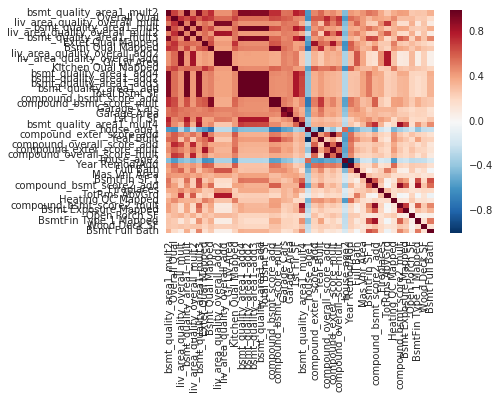

In [454]:
sns.heatmap(train_numeric[abs_corr_vs_target_over30.index].corr())
plt.show()

### Note 1.
* We can see high corerlation among features with high correlation ((abs corr. > .5) versus target variable(SalePrice).
* In contrast, relatively low correlation among features with low correlation (abs corr. > .3) versus target variable(SalePrice).
* For the newly created features, we can observe high correlations among created features, especially for the features created in similar process.

### Approach 1. Leave the best features among the simliars
* Among features created in similar process(e.g., `compound_bsmt_score_add` and `compound_bsmt_score_mult`), select one feature with the highest correlation vs. target price.
* Exclude the other features

In [455]:
abs_corr_vs_target_over30

bsmt_quality_area1_mult2          0.805632
Overall Qual                      0.804562
liv_area_quality_overall_mult     0.793994
bsmt_quality_area1_mult           0.775734
liv_area_quality_overall_mult2    0.768301
bsmt_quality_area1_mult3          0.753685
Exter Qual Mapped                 0.714152
Bsmt Qual Mapped                  0.706397
liv_area_quality_overall_add2     0.704730
liv_area_quality_overall_add      0.700205
Gr Liv Area                       0.698990
Kitchen Qual Mapped               0.694912
bsmt_quality_area1_add4           0.692074
bsmt_quality_area1_add2           0.684927
bsmt_quality_area1_add3           0.684865
bsmt_quality_area1_add            0.683634
Total Bsmt SF                     0.682986
compound_bsmt_score_add           0.673029
compound_bsmt_score_mult          0.664326
Garage Cars                       0.663485
Garage Area                       0.662397
1st Flr SF                        0.657119
bsmt_quality_area1_mult4          0.608036
house_age1 

In [456]:
# group the similary created features.
group1 = ['house_age1', 'house_age2']
group2 = ['compound_overall_score_add', 'compound_overall_score_mult']
group3 = ['compound_exter_score_add', 'compound_exter_score_mult']
group4 = ['compound_bsmt_score_add', 'compound_bsmt_score2_add',
         'compound_bsmt_score_mult', 'compound_bsmt_score2_mult']
group5 = ['liv_area_quality_overall_add', 'liv_area_quality_overall_add2',
         'liv_area_quality_overall_mult', 'liv_area_quality_overall_mult2']

group6 = ['bsmt_quality_area1_add', 'bsmt_quality_area1_add2',
         'bsmt_quality_area1_add3', 'bsmt_quality_area1_add4',
         'bsmt_quality_area1_mult', 'bsmt_quality_area1_mult2',
         'bsmt_quality_area1_mult3', 'bsmt_quality_area1_mult4']

In [457]:
groups = [group1, group2, group3, group4, group5, group6]

In [458]:
# choose one feature with the highest corr. vs target from each group
best_created_features = []

for group in groups:
    concat = pd.concat([train['SalePrice'],train_numeric[group]], axis=1)
    best_f = abs(concat.corr().iloc[1:, 0]).sort_values(ascending=False).index[0]
    best_created_features.append(best_f)
        
best_created_features

['house_age1',
 'compound_overall_score_add',
 'compound_exter_score_add',
 'compound_bsmt_score_add',
 'liv_area_quality_overall_mult',
 'bsmt_quality_area1_mult2']

In [459]:
for i, group in enumerate(groups):
    # remove the highest correlated feature from each group
    group.remove(best_created_features[i])
    
    # drop the features left - except the highest of each group
    train_numeric.drop(group, axis=1, inplace=True)
    test_numeric.drop(group, axis=1, inplace=True)

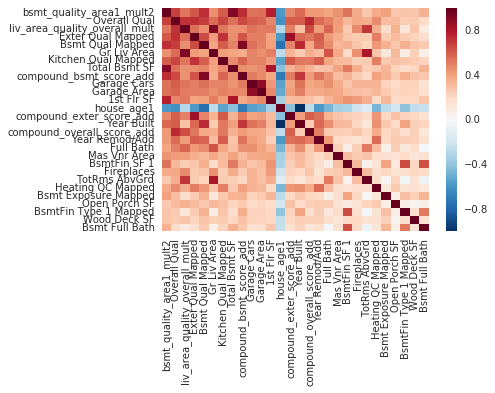

In [460]:
abs_corr_vs_target = pd.concat([train['SalePrice'],train_numeric],axis=1).corr().iloc[1:,0].apply(abs).sort_values(ascending=False)
abs_corr_vs_target_over30 = abs_corr_vs_target[abs_corr_vs_target > 0.3]
sns.heatmap(train_numeric[abs_corr_vs_target_over30.index].corr())
plt.show()

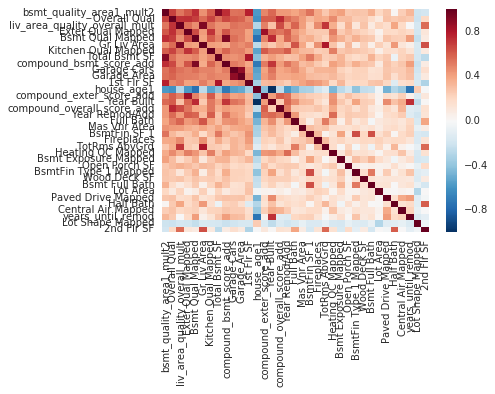

In [461]:
abs_corr_vs_target_over20 = abs_corr_vs_target[abs_corr_vs_target > 0.2]
sns.heatmap(train_numeric[abs_corr_vs_target_over20.index].corr())
plt.show()

In [462]:
train_numeric[abs_corr_vs_target_over20.index].corr().columns

Index(['bsmt_quality_area1_mult2', 'Overall Qual',
       'liv_area_quality_overall_mult', 'Exter Qual Mapped',
       'Bsmt Qual Mapped', 'Gr Liv Area', 'Kitchen Qual Mapped',
       'Total Bsmt SF', 'compound_bsmt_score_add', 'Garage Cars',
       'Garage Area', '1st Flr SF', 'house_age1', 'compound_exter_score_add',
       'Year Built', 'compound_overall_score_add', 'Year Remod/Add',
       'Full Bath', 'Mas Vnr Area', 'BsmtFin SF 1', 'Fireplaces',
       'TotRms AbvGrd', 'Heating QC Mapped', 'Bsmt Exposure Mapped',
       'Open Porch SF', 'BsmtFin Type 1 Mapped', 'Wood Deck SF',
       'Bsmt Full Bath', 'Lot Area', 'Paved Drive Mapped', 'Half Bath',
       'Central Air Mapped', 'years_until_remod', 'Lot Shape Mapped',
       '2nd Flr SF'],
      dtype='object')

In [463]:
def choose_best_numeric_feature_comb(df, threshold=.2):
    '''docs
    Find the best numerical feature combination.
    input : sorted corrmat by absolute value of correlation vs. target price
    output : a list of features chosen.
    '''
    
    corrmat = df.corr()
    drop_li = []
    
    for i, col in enumerate(corrmat.columns):
        
        #print(i, col)
        
        if col in drop_li:
            pass

        else:
            row = abs(corrmat.iloc[i, i+1:])
            #print(row)
            to_drop = row[row > threshold].index
            #print(to_drop)
            drop_li += to_drop.tolist()
    
    return list(set(corrmat.columns) - set(drop_li))

In [464]:
best_numeric_features_th40 = choose_best_numeric_feature_comb(train_numeric[abs_corr_vs_target_over20.index],
                                                             threshold=.4)
best_numeric_features_th30 = choose_best_numeric_feature_comb(train_numeric[abs_corr_vs_target_over20.index],
                                                             threshold=.3)
best_numeric_features_th20 = choose_best_numeric_feature_comb(train_numeric[abs_corr_vs_target_over20.index])

In [465]:
best_numeric_features_th40

['bsmt_quality_area1_mult2',
 'Central Air Mapped',
 'Lot Area',
 'BsmtFin Type 1 Mapped',
 'Lot Shape Mapped',
 'Paved Drive Mapped',
 'Half Bath',
 'Open Porch SF',
 'Full Bath',
 'Heating QC Mapped',
 'Wood Deck SF',
 'Fireplaces']

In [466]:
lr = LinearRegression()
lr.fit(scaled_train_numeric[abs_corr_vs_target_over30.index], np.log(train['SalePrice']))
print(lr.score(scaled_train_numeric[abs_corr_vs_target_over30.index], 
               np.log(train['SalePrice'])))
print(lr.score(scaled_test_numeric[abs_corr_vs_target_over30.index],
        np.log(test['SalePrice'])))

0.894950774532
0.829558157254


### Update `select_features()` and `train_and_test()` function

In [470]:
def select_features(df, threshold_corr, threshold_colinear=None):
    
    abs_corr_vs_target = pd.concat([train['SalePrice'], df], axis=1).corr().iloc[1:,0]\
                                .apply(abs).sort_values(ascending=False)
    abs_corr_vs_target_th = abs_corr_vs_target[abs_corr_vs_target > threshold_corr]
    
    if threshold_colinear:
        filtered = choose_best_numeric_feature_comb(df[abs_corr_vs_target_th.index],
                                                    threshold=threshold_colinear)
        return df[filtered]
        
    return df[abs_corr_vs_target_th.index]

In [471]:
def train_and_test(train_df, test_df, k=0):
    
    X_train = train_df
    y_train = np.log(train['SalePrice'])
    X_test = test_df
    y_test = np.log(test['SalePrice'])
    
    lr = LinearRegression()
    
    if k:
        scores = cross_val_score(lr, 
                                 pd.concat([X_train, X_test], axis=0),
                                 pd.concat([y_train, y_test], axis=0), 
                                 cv=k,
                                scoring='r2')
        return np.mean(scores)
        
    else:
        lr.fit(X_train, y_train)
        pred = lr.predict(X_test)

        return r2_score(pred, y_test)

In [472]:
train_and_test(scaled_train_numeric[abs_corr_vs_target_over30.index], 
               scaled_test_numeric[abs_corr_vs_target_over30.index], 
               k=5)

0.86225610590002921

# Further Step 1.
### Write a function to make features nonlinear and add to dataframe

In [473]:
def add_non_linear_feature(df):
    
    df_ = df.copy()
    
    for col in df.columns:
        
        # add 6 to all values in column to make log possible
        df_[col+'_log'] = np.log(df_[col]+6)
        df_[col+'_sqrd'] = df_[col]**2
        df_[col+'_cube'] = df_[col]**3
    
    return df_

In [474]:
scaled_data = pd.concat([scaled_train_numeric,
                        scaled_test_numeric]
                        ,axis=0)

In [475]:
scaled_data_add_nonlinear = add_non_linear_feature(scaled_data[abs_corr_vs_target_over30.index])

In [476]:
# to concatenate with data['SalePrice'], redefine the index range.
scaled_data_add_nonlinear.index = data.index

In [477]:
for threshold in range(30, 80, 10):
    
    selected_df = select_features(scaled_data_add_nonlinear, threshold_corr = threshold/100)
    
    print('threshold for corr vs. target price =', threshold/100)
    print(train_and_test(selected_df.iloc[:1460], 
                       selected_df.iloc[1460:], 
                       k=5))
    print('')

threshold for corr vs. target price = 0.3
0.615854380549

threshold for corr vs. target price = 0.4
0.64081870748

threshold for corr vs. target price = 0.5
0.86924564991

threshold for corr vs. target price = 0.6
0.873724834386

threshold for corr vs. target price = 0.7
0.839257672709



In [521]:
dataset_r2_873 = select_features(scaled_data_add_nonlinear, threshold_corr = .6)

In [478]:
select_features(scaled_data_add_nonlinear, threshold_corr = .6).columns

Index(['bsmt_quality_area1_mult2', 'Overall Qual',
       'liv_area_quality_overall_mult', 'liv_area_quality_overall_mult_log',
       'bsmt_quality_area1_mult2_log', 'Overall Qual_log', 'Exter Qual Mapped',
       'Bsmt Qual Mapped', 'Gr Liv Area', 'Exter Qual Mapped_log',
       'Kitchen Qual Mapped', 'Gr Liv Area_log', 'Total Bsmt SF',
       'Bsmt Qual Mapped_log', 'compound_bsmt_score_add',
       'Kitchen Qual Mapped_log', 'Garage Cars', 'Garage Area', '1st Flr SF',
       'Overall Qual_cube', 'Total Bsmt SF_log', 'Garage Area_log',
       '1st Flr SF_log', 'Garage Cars_log', 'compound_bsmt_score_add_log',
       'house_age1_log', 'Bsmt Qual Mapped_cube', 'Exter Qual Mapped_cube'],
      dtype='object')

### R2 via KFold(5) CV : slightly improved
`0.862` ---> `0.873` when filtering nonlinear features by threshold = `0.6`

#### Current best features (numerical):
['bsmt_quality_area1_mult2', 'Overall Qual',
       'liv_area_quality_overall_mult', 'liv_area_quality_overall_mult_log',
       'bsmt_quality_area1_mult2_log', 'Overall Qual_log', 'Exter Qual Mapped',
       'Bsmt Qual Mapped', 'Gr Liv Area', 'Exter Qual Mapped_log',
       'Kitchen Qual Mapped', 'Gr Liv Area_log', 'Total Bsmt SF',
       'Bsmt Qual Mapped_log', 'compound_bsmt_score_add',
       'Kitchen Qual Mapped_log', 'Garage Cars', 'Garage Area', '1st Flr SF',
       'Overall Qual_cube', 'Total Bsmt SF_log', 'Garage Area_log',
       '1st Flr SF_log', 'Garage Cars_log', 'compound_bsmt_score_add_log',
       'house_age1_log', 'Bsmt Qual Mapped_cube', 'Exter Qual Mapped_cube']

# Further Step 2.
### Add categorical features as dummy columns

In [481]:
train_.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
 

In [487]:
# non-ordinal categorical features with less than 10 unique values(labels).
nominal_cats = ['MS SubClass', 'MS Zoning', 'Lot Config',
               'Neighborhood', 'Condition 1', 'Condition 2',
                'Bldg Type', 'House Style', 'Roof Style',
                'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
                'Mas Vnr Type', 'Foundation', 'Heating',
                'Electrical', 'Sale Condition']


nominal_cats_lt10_uniques = []
for col in nominal_cats:
    
    print(col, len(train_[col].unique()))
    nominal_cats_lt10_uniques.append(col)

MS SubClass 15
MS Zoning 6
Lot Config 5
Neighborhood 26
Condition 1 9
Condition 2 6
Bldg Type 5
House Style 8
Roof Style 6
Roof Matl 5
Exterior 1st 14
Exterior 2nd 16
Mas Vnr Type 4
Foundation 6
Heating 6
Electrical 4
Sale Condition 5


* normalize labels using `LabelEncoder`

In [490]:
from sklearn.preprocessing import LabelEncoder

def label_encode_col(col):
    
    le = LabelEncoder()
    
    return le.fit_transform(train_[col])    

In [494]:
nominal_cats_df = train_[nominal_cats_lt10_uniques].copy()

In [495]:
for col in nominal_cats_df.columns:
    le = LabelEncoder()
    nominal_cats_df[col] = le.fit_transform(nominal_cats_df[col])

In [498]:
train_[nominal_cats_lt10_uniques].head()

,MS SubClass,MS Zoning,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Electrical,Sale Condition
0,20,RL,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,CBlock,GasA,SBrkr,Normal
1,20,RH,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,GasA,SBrkr,Normal
2,20,RL,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,CBlock,GasA,SBrkr,Normal
3,20,RL,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,CBlock,GasA,SBrkr,Normal
4,60,RL,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,SBrkr,Normal


In [496]:
nominal_cats_df.head()

,MS SubClass,MS Zoning,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Electrical,Sale Condition
0,0,4,0,13,2,2,0,2,3,0,3,9,3,1,1,3,3
1,0,3,4,13,1,2,0,2,1,0,11,13,2,1,1,3,3
2,0,4,0,13,2,2,0,2,3,0,12,14,1,1,1,3,3
3,0,4,0,13,2,2,0,2,3,0,3,3,2,1,1,3,3
4,5,4,4,8,2,2,0,5,1,0,11,13,2,2,1,3,3


In [499]:
len(nominal_cats_df.columns)

17

In [505]:
for col in nominal_cats_df.columns:
    print(col, ':',
          nominal_cats_df[col].min(), '/',
         nominal_cats_df[col].max())

MS SubClass : 0 / 14
MS Zoning : 0 / 5
Lot Config : 0 / 4
Neighborhood : 0 / 25
Condition 1 : 0 / 8
Condition 2 : 0 / 5
Bldg Type : 0 / 4
House Style : 0 / 7
Roof Style : 0 / 5
Roof Matl : 0 / 4
Exterior 1st : 0 / 13
Exterior 2nd : 0 / 15
Mas Vnr Type : 0 / 3
Foundation : 0 / 5
Heating : 0 / 5
Electrical : 0 / 3
Sale Condition : 0 / 4


* draw box-plots

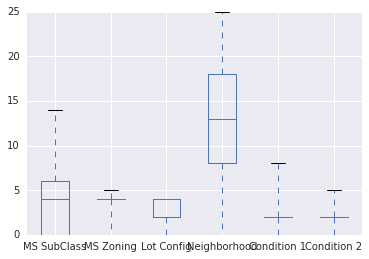

In [502]:
nominal_cats_df.iloc[:, :6].plot(kind='box', ); plt.show()

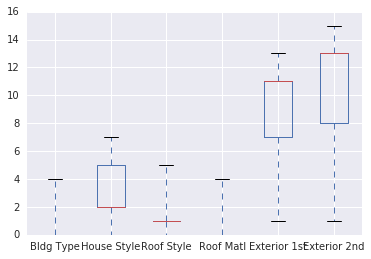

In [506]:
nominal_cats_df.iloc[:, 6:12].plot(kind='box', ); plt.show()

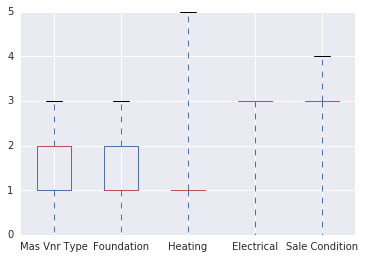

In [507]:
nominal_cats_df.iloc[:, 12:].plot(kind='box', ); plt.show()

* Chi-square test

In [510]:
from sklearn.feature_selection import chi2

_, pvals = chi2(nominal_cats_df, train_['SalePrice'])

In [511]:
for (col, pval) in zip(nominal_cats_df.columns, pvals):
    print(col, ':', pval)

MS SubClass : 2.21931748201e-244
MS Zoning : 1.0
Lot Config : 0.993665794934
Neighborhood : 9.79219768162e-144
Condition 1 : 1.0
Condition 2 : 1.0
Bldg Type : 5.50092342583e-116
House Style : 3.83699518282e-10
Roof Style : 1.0
Roof Matl : 5.05319650378e-98
Exterior 1st : 0.760562242985
Exterior 2nd : 1.99365124487e-09
Mas Vnr Type : 1.0
Foundation : 1.0
Heating : 1.0
Electrical : 1.0
Sale Condition : 1.0


In [513]:
nom_cat_pvals = pd.Series(pvals, index=nominal_cats_df.columns)
nom_cat_pvals[nom_cat_pvals < .05].index

Index(['MS SubClass', 'Neighborhood', 'Bldg Type', 'House Style', 'Roof Matl',
       'Exterior 2nd'],
      dtype='object')

In [534]:
dataset_r2_873_add_cat = pd.concat([dataset_r2_873,
                       pd.get_dummies(data[nom_cat_pvals[nom_cat_pvals < .05].index])],
                       axis=1)

In [535]:
train_and_test(dataset_r2_873_add_cat.iloc[:1460], 
               dataset_r2_873_add_cat.iloc[1460:], 
               k=5)

0.88769579342031624

### R2 via KFold(5) CV : slightly improved
`0.873` ---> `0.887` when using the following category features as dummies:
* ['MS SubClass', 'Neighborhood', 'Bldg Type', 'House Style', 'Roof Matl','Exterior 2nd']


# Final score (r^2 / KFold=5) : `0.887`
### Selected features 
**Numerical**<br>
scaled<br>
`28` features (`28` columns)
* ['bsmt_quality_area1_mult2', 'Overall Qual', 'liv_area_quality_overall_mult', 'liv_area_quality_overall_mult_log', 'bsmt_quality_area1_mult2_log', 'Overall Qual_log', 'Exter Qual Mapped', 'Bsmt Qual Mapped', 'Gr Liv Area', 'Exter Qual Mapped_log', 'Kitchen Qual Mapped', 'Gr Liv Area_log', 'Total Bsmt SF', 'Bsmt Qual Mapped_log', 'compound_bsmt_score_add', 'Kitchen Qual Mapped_log', 'Garage Cars', 'Garage Area', '1st Flr SF', 'Overall Qual_cube', 'Total Bsmt SF_log', 'Garage Area_log', '1st Flr SF_log', 'Garage Cars_log', 'compound_bsmt_score_add_log', 'house_age1_log', 'Bsmt Qual Mapped_cube', 'Exter Qual Mapped_cube']<br>

**Categorical**<br>
one-hot encode (dummies)<br>
`6` features (`67` columns)
* ['MS SubClass', 'Neighborhood', 'Bldg Type', 'House Style', 'Roof Matl','Exterior 2nd']

**Target**<br>
`np.log('SalePrice')`

### And more ...
* If we exclude extreme values (outliers) from dataset, we can possibly get a better score.
* However, finding/excluding outlier is out of the scope at the current course - we will try later.